From: https://w.wiki/6aJ3 updated https://w.wiki/6crp 

Wikidata link: [http://www.wikidata.org/entity/Q9916](http://www.wikidata.org/entity/Q9916)

Title: Dwight D. Eisenhower



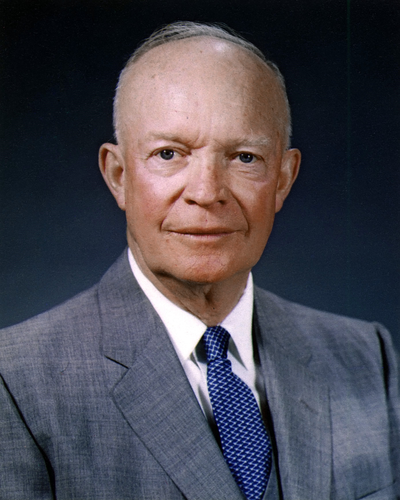




Wikidata link: [http://www.wikidata.org/entity/Q10068](http://www.wikidata.org/entity/Q10068)

Title: Lindsey Vonn



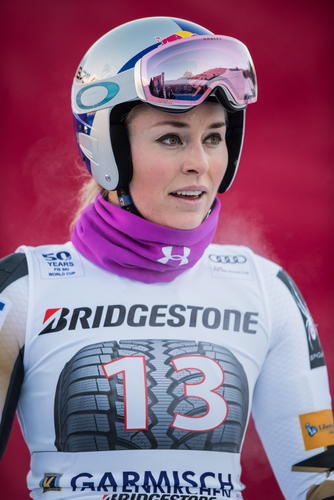




Wikidata link: [http://www.wikidata.org/entity/Q10731](http://www.wikidata.org/entity/Q10731)

Title: Mick Foley



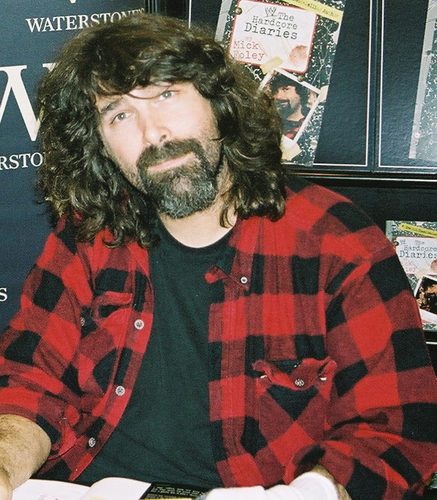




Wikidata link: [http://www.wikidata.org/entity/Q10731](http://www.wikidata.org/entity/Q10731)

Title: Mick Foley



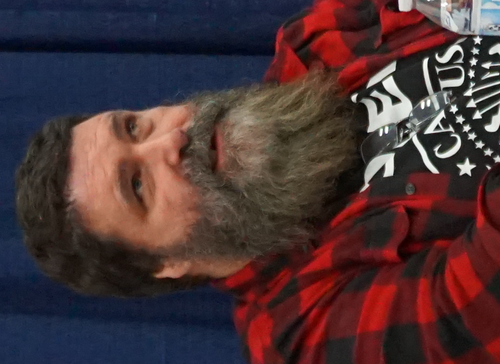




Wikidata link: [http://www.wikidata.org/entity/Q10993](http://www.wikidata.org/entity/Q10993)

Title: Tiger Woods



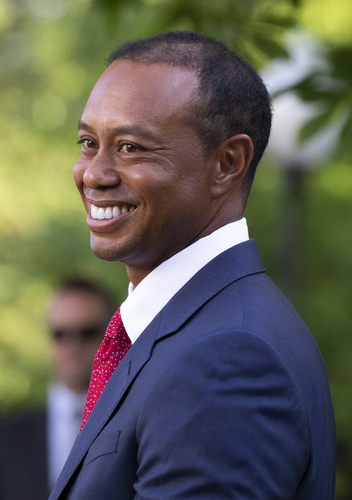




Wikidata link: [http://www.wikidata.org/entity/Q11093](http://www.wikidata.org/entity/Q11093)

Title: Valerie Solanas



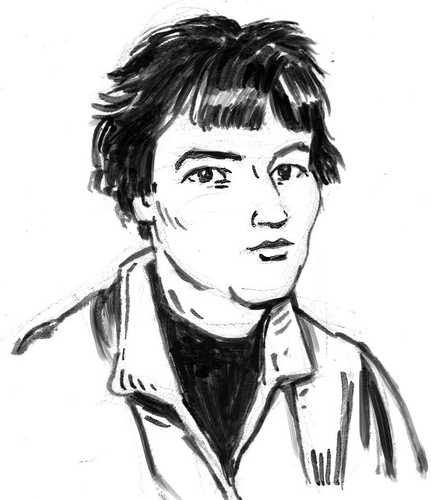




Wikidata link: [http://www.wikidata.org/entity/Q11239](http://www.wikidata.org/entity/Q11239)

Title: David Rockefeller



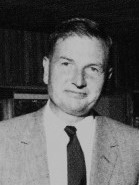




Wikidata link: [http://www.wikidata.org/entity/Q11313](http://www.wikidata.org/entity/Q11313)

Title: John Knoll



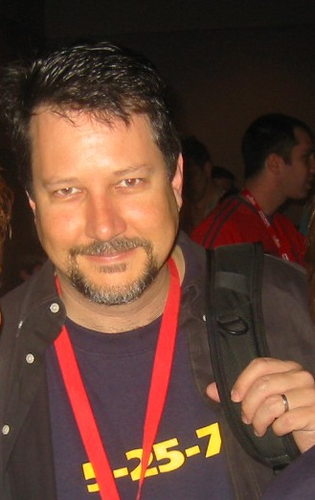




Wikidata link: [http://www.wikidata.org/entity/Q11459](http://www.wikidata.org/entity/Q11459)

Title: Serena Williams



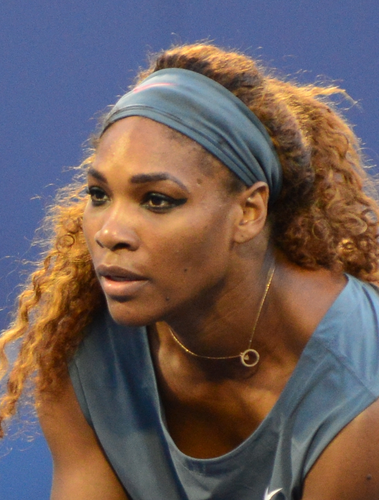

In [3]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

from PIL import Image
import requests

endpoint_url = "https://query.wikidata.org/sparql"

query = """#authors with country of citizenship United States who do not have a Goodreads identifier
SELECT ?item ?itemLabel ?image WHERE {
  ?item wdt:P31 wd:Q5;
    wdt:P27 wd:Q30;
    wdt:P106 wd:Q36180.
  MINUS { ?item wdt:P2963 _:b1. }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  OPTIONAL { ?item wdt:P18 ?image. }
}
LIMIT 9"""

# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

# MAIN PROGRAM


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print('Wikidata link: ' + '[' + result['item']['value'] + ']' + '(' + result['item']['value'] + ')' + '\n')
    print('Title: ' + result['itemLabel']['value'] + '\n')

    if 'image' in result:
      # get image from image URL and display resized version
      image_url=result['image']['value']
      headers = {'User-Agent': 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'}
      im = get_image(image_url, headers)
      im.thumbnail((500, 500), Image.Resampling.LANCZOS)
      display(im)
    print('\n\n')
